In [4]:
print("Python běží!")

Python běží!


In [26]:
import sys

sys.path.append('../')
sys.path.append('../my_libs/')
sys.path.append('../my_libs/img/')

!{sys.executable} -m pip install -r ../../pip-dependencies.txt


Defaulting to user installation because normal site-packages is not writeable


In [34]:
import my_libs as ml
from my_libs.tools import *
from my_libs.fft import *
from my_libs.colors import *
from my_libs.img.processing import *

In [31]:
ml.tools.printf("Hello world!")

Hello world!

# Cvičení 3

In [6]:
import os
import numpy as np
from scipy.fft import dctn 
import matplotlib.pyplot as plt
import cv2

In [7]:
def find_pictures(folder, file_type: str = ["jpg"]):
    cwd = os.getcwd()
    folder = os.path.join(cwd, folder)
    picture_files = []
    print("Current working directory: {0}, files: ".format(cwd))
    for file in os.listdir(folder):
        # TODO: get file format
        print(file)
        picture_files.append(os.path.join(folder, file))
    return picture_files


def load_images(picture_files: list[str]) -> list[np.ndarray]:
    """ Load images from files
    get:
        picture_files - list of files
    return:
        images - list of images
    """
    images = []
    for file in picture_files:
        bgr = cv2.imread(file)
        rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
        images.append(rgb)
    return images


def convert_images_to_gray(images: list[np.ndarray]) -> list[np.ndarray]:
    gray_images = []
    for image in images:
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        gray_images.append(gray)
    return gray_images

def convert_images_to_HSW(images: list[np.ndarray]) -> list[np.ndarray]:
    hsw_images = []
    for image in images:
        hsw = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
        hsw_images.append(hsw)
    return hsw_images


def calculate_histogram(images) -> list:
    histograms = []
    for image in images:
        h, be = np.histogram(image, bins=256, range=(0, 255))
        histograms.append(h)
    return histograms


def histogram_distances_from(histograms, i: int) -> np.ndarray:
    """ Calculate distances from histogram i to all other histograms
    get:
        histograms - list of histograms
        i - index of histogram
    return:
        distances - np.ndarray of distances
    """
    hist = histograms[i]
    distances = []
    for j, h in enumerate(histograms):
        if i == j:
            distances.append(0)
        else:
            distances.append(np.linalg.norm(hist-h))
    distances = np.array(distances)
    return distances


In [8]:
# Load image
folder = 'data/'
picture_files = find_pictures(folder)
picture_files.sort()
number_of_images = len(picture_files)

images = load_images(picture_files)

Current working directory: /home/pytel/Skola/TUL-navazující_studium/3. semestr/PVI-Pocitacove_videni/cviceni/cv03, files: 
pvi_cv03_im06.jpg
pvi_cv03_im07.jpg
pvi_cv03_im03.jpg
pvi_cv03_im08.jpg
pvi_cv03_im04.jpg
pvi_cv03_im01.jpg
pvi_cv03_im02.jpg
pvi_cv03_im09.jpg
pvi_cv03_im05.jpg


## Provnání podle histogramu gray složky

Sorted images:
[0 3 2 1 5 6 8 7 4]
[1 2 3 5 0 6 8 7 4]
[2 1 5 3 6 8 7 0 4]
[3 0 2 1 5 7 6 8 4]
[4 5 6 7 8 2 1 3 0]
[5 2 8 6 7 1 3 4 0]
[6 8 7 5 2 1 4 3 0]
[7 6 8 5 2 1 4 3 0]
[8 6 7 5 2 1 4 3 0]


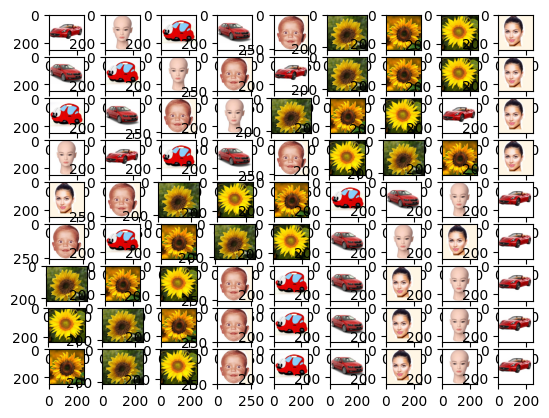

In [9]:
histograms = calculate_histogram(convert_images_to_gray(images))

# show images
plt.figure()
print("Sorted images:")
for i, image in enumerate(images):
    distances = histogram_distances_from(histograms, i)

    # sort distances
    sorted_indices = np.argsort(distances)
    print(sorted_indices)

    # show images
    for j, img_index in enumerate(sorted_indices):
        plt.subplot(number_of_images, number_of_images,
                    number_of_images*i+j+1)
        plt.imshow(images[img_index])

plt.show()

## Provnání podle histogramu Hue složky

Sorted images:
[0 1 3 2 5 8 7 6 4]
[1 0 2 3 5 7 8 6 4]
[2 3 1 0 5 8 7 6 4]
[3 2 1 0 5 8 7 6 4]
[4 5 8 7 6 2 3 1 0]
[5 7 8 6 4 2 3 1 0]
[6 7 8 5 4 2 3 1 0]
[7 8 6 5 4 2 3 1 0]
[8 7 6 5 4 2 3 1 0]


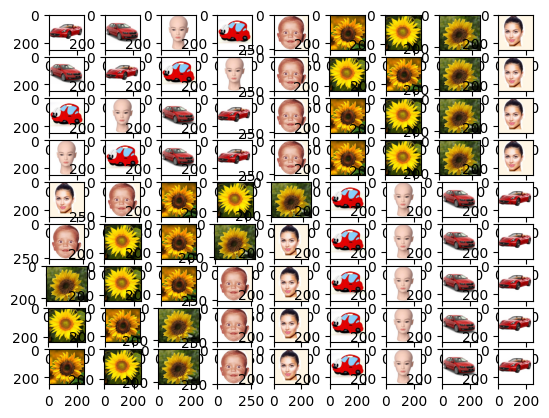

In [10]:
histograms = calculate_histogram(convert_images_to_HSW(images))

# show images
plt.figure()
print("Sorted images:")
for i, image in enumerate(images):
    distances = histogram_distances_from(histograms, i)

    # sort distances
    sorted_indices = np.argsort(distances)
    print(sorted_indices)

    # show images
    for j, img_index in enumerate(sorted_indices):
        plt.subplot(number_of_images, number_of_images,
                    number_of_images*i+j+1)
        plt.imshow(images[img_index])

plt.show()

## Provnání podle vektoru DCT složky

Naprogramujte funkci, která vypočte a zobrazí 2D amplitudové spektrum 
(z 2D DFT) pro libovolný (šedotónový) obrázek. Přeskupte kvadranty spektra, 
aby  uprostřed  byly  nízké  frekvence.  Zobrazujte  logaritmus  z  absolutní 
hodnoty, spolu s colorbarem.

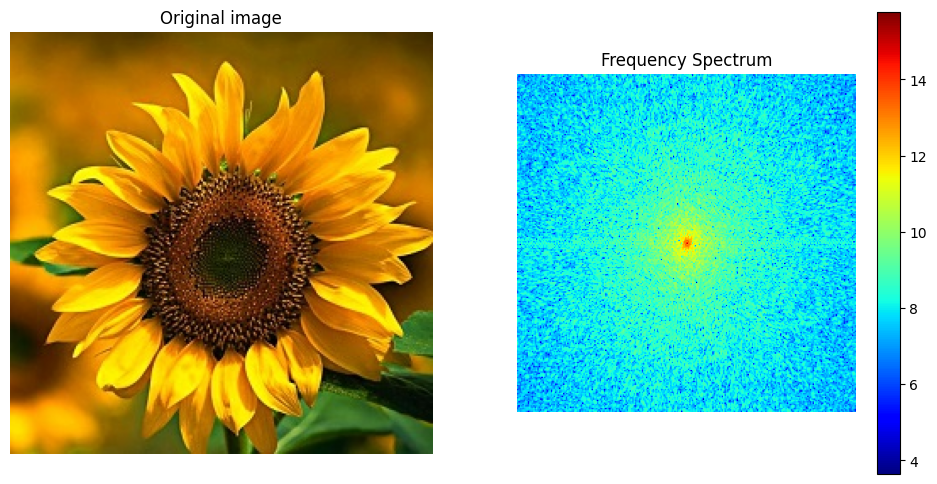

In [54]:
index = 8
img = images[index]

plt.figure(figsize=(12, 6))

# Původní obrázek
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original image")
plt.axis('off')

# Fourierova transformace
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
fft2 = np.fft.fft2(gray)
fft2_shifted = np.fft.fftshift(fft2)
magnitude_spectrum = np.log(np.abs(fft2_shifted) + 1)  # Přidání 1 pro zabránění log(0)

# Normalizace spektra
#magnitude_spectrum = (magnitude_spectrum - magnitude_spectrum.min()) / (magnitude_spectrum.max() - magnitude_spectrum.min())

# Frekvenční spektrum
plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='jet')
plt.title("Frequency Spectrum")
plt.colorbar()
plt.axis('off')

plt.show()



In [65]:
def vector_distance(v1, v2):
    return np.linalg.norm(v1-v2)

def calculate_dcts(images) -> list:
    """ Calculate DCTs of images
    get:
        images - list of images
    return:
        dcts - list of DCTs
    """
    dcts = []
    for image in images:
        dct = cv2.dct(np.float32(image))
        dcts.append(dct)
    return dcts

def get_short_vector_from_dct(dct, n: int) -> np.ndarray:
    """ Get short vector from DCT
    get:
        dct - DCT
        n - number of coefficients
    return:
        vector - np.ndarray of coefficients
    """
    vector = dct.flatten()
    vector = vector[:n]
    return vector

def vector_distances_from(vector, i: int) -> np.ndarray:
    """ Calculate distances from histogram i to all other histograms
    get:
        histograms - list of histograms
        i - index of histogram
    return:
        distances - np.ndarray of distances
    """
    vect = vector[i]
    distances = []
    for j, v in enumerate(vector):
        if i == j:
            distances.append(0)
        else:
            distances.append(vector_distance(vect, v))
    distances = np.array(distances)
    return distances

In [61]:
dctM = dctn(img) 
R = 5 
dctRvec = dctM[0:R, 0:R].flatten()
print(dctRvec)

[ 1.38188624e+08  6.45886111e+07 -1.33544840e+07  8.72635806e+06
  5.97870446e+06 -5.64433070e+05  1.69403537e+06  1.53845839e+06
 -1.35880663e+06 -9.38018641e+05 -4.71299181e+04  6.73404005e+05
 -7.18726243e+06 -3.96083243e+06  7.57174299e+05  3.02260995e+06
  4.45575099e+06  1.16438634e+06 -2.89157737e+06 -2.72719951e+06
 -1.84713381e+05  8.32383895e+05  6.12531339e+05 -4.78590561e+04
  4.87244078e+04 -2.93325138e+05 -3.66678486e+05  2.11881609e+06
  8.92903031e+05 -4.85873167e+05 -2.15024888e+06 -1.55162631e+06
 -2.41576828e+06  3.11162596e+06  2.78957891e+06  6.30299794e+05
 -1.05930711e+07 -5.32827685e+06  2.34709279e+06  1.72595788e+06
  7.77508802e+05 -3.42802920e+05  6.31048256e+06  3.65515474e+06
 -5.94101451e+05 -9.64158930e+06 -4.20994775e+06  1.53706930e+06
 -1.45680832e+06 -1.13985102e+06  6.54266073e+04  4.16490411e+05
  2.10037138e+05  1.66017050e+05 -2.62285722e+06 -1.01125797e+06
  5.77980055e+05 -3.68951300e+06 -2.33417760e+06  1.04093363e+05
 -1.16270746e+07 -6.63940

Sorted images:
[0 1 4 3 5 2 8 7 6]
[1 2 0 5 4 3 8 7 6]
[2 1 5 0 4 3 8 7 6]
[3 4 0 1 5 2 8 7 6]
[4 3 0 1 5 2 8 7 6]
[5 2 1 0 4 3 8 7 6]
[6 8 7 2 1 5 0 4 3]
[7 6 8 2 1 5 0 4 3]
[8 6 7 2 1 5 0 4 3]


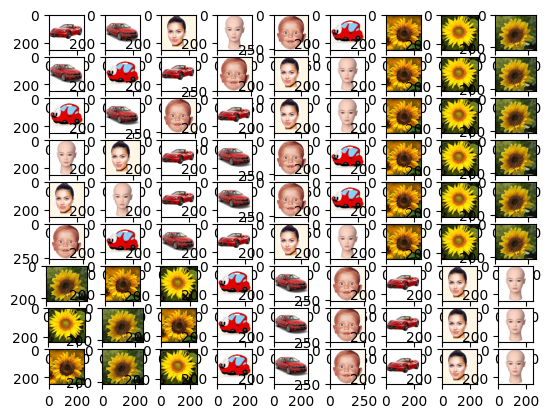

In [67]:
dcts = calculate_dcts(convert_images_to_gray(images))
dcts_short = [get_short_vector_from_dct(dct, 5*5) for dct in dcts]

# show images
plt.figure()
print("Sorted images:")
for i, image in enumerate(images):
    distances = vector_distances_from(dcts_short, i)

    # sort distances
    sorted_indices = np.argsort(distances)
    print(sorted_indices)

    # show images
    for j, img_index in enumerate(sorted_indices):
        plt.subplot(number_of_images, number_of_images,
                    number_of_images*i+j+1)
        plt.imshow(images[img_index])

plt.show()